Shooting method to solve s'quare well problem of time-independent Schroedinger equation
finite well $V_0$, $[-L,L]$

Reference: **Computational Physics, second edition**   
by Nicholas J. Giordano, Hisao Nakanishi     
Chapter 10.2 One dimension: shooting and matching methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def potential(x,V0=1000,L=1):
    if x <= L:
        V = 0
    else:
        V = V0
    return V

In [3]:
def generate_x_grid(L=1,dx=0.01,V0=1000):
    # generate x grid
    if V0>=80:
        x = np.arange(0, L+dx, dx) # infinite well        
    else:
        x = np.arange(0, 80/V0*L+dx, dx)  # finite well, you need to change the multiplication factor
    return x

In [4]:
def initialize_psi(N,dx,parity='even'):
    # intialize wave function
    psi = np.zeros(N)

    if parity == 'even':
        # initial condition of even partiy solution
        psi[0] = 1
        psi[1] = psi[0]
    else:
        # initial condition of odd partiy solution
        psi[0] = 0
        psi[1] = dx
    return psi

In [24]:
def square_well_shooting(E=0.1, parity='even', V0=1000, L=1, dx=0.01, dE=0.01, b=2):
    # initial guess of energy E, increment dE
    # wavefunction with define parity
    # half width of square well L
    # step size of x grid dx
    # cutoff parameter b, we need to adjust it to handle other potentials
    
    x = generate_x_grid(L,dx,V0);
    N = len(x)

    #parity = 'even'# even partiy solution
    #partiy = 'odd' # odd partiy solution
    psi = initialize_psi(N,dx,parity);    

   
    tol = 0.5e-10   # stopping criterion, if wave function converges

    # initialize last_diverge which keeps tracks of the direction of the divergin trned
    last_diverge = 0 # we don't kow this direction a priori

    dx2 = dx * dx
    while True:
        for i in range(2,N-2):
            psi[i] = 2*psi[i-1] - psi[i-2] - 2 * (E - potential(x[i-1],V0,L)) * psi[i-1] * dx2
            if abs(psi[i]) > b:
                 break

        if abs(dE) < tol:
            break

        if psi[i] * last_diverge < 0:
            dE = -dE / 2
        E = E + dE
        last_diverge = np.sign(psi[i])
    
    xi = np.concatenate([-x[-1:0:-1],x])                   

    if psi[0] == 0:
        psii = np.concatenate([-psi[-1:0:-1],psi])
    else:
        psii = np.concatenate([psi[-1:0:-1],psi])
    psii = psii / np.sqrt(np.sum(psii * psii)) # normalisation

    return E,xi,psii    

In [28]:
def square_well_shooting_app(V0=20,L=1):
    
    # plot the lowest four states
    
    # initialize plot
    fig = plt.figure(figsize=(10,7))
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$')
    plt.grid('on')
    plt.axhline()
    
    # initialize first guess
    E_init = 0.1
    DeltaE = 0.2
    
    for n in range(0,2):
        E,x,psi = square_well_shooting(E_init,'even',V0,L)
        plt.plot(x,psi,label='E={:.3f}'.format(E))
        print('E = {:.3f}, normalizatoin = {:.5f}'.format(E,np.sum(psi*psi)))
        
        E,x,psi = square_well_shooting(E_init,'odd',V0,L)
        plt.plot(x,psi,label='E={:.3f}'.format(E))
        print('E = {:.3f}, normalizatoin = {:.5f}'.format(E,np.sum(psi*psi)))
        
        E_init = E + DeltaE
    
    plt.legend()
    if V0==1000:
        plt.title('Infinite Well, L = {:}'.format(L))
    else:
        plt.title('Finite Well, Vo = {:}, L = {}'.format(V0,L))

In [29]:
def test_wavefunction():
    fig = plt.figure(figsize=(10,7))
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$')
    plt.grid('on')
    plt.axhline()
    E = float(input('Initial guess of E: '))
    dE = 0.01
    b = float(input('cutoff parameter b: '))
    for i in range(2,N-2):
        psi[i] = 2*psi[i-1] - psi[i-2] - 2 * (E - potential(x[i-1])) * psi[i-1] * dx2
        if abs(psi[i]) > b:
             break
    plt.plot(x,psi)      

E = 1.832, normalizatoin = 1.00000
E = 7.163, normalizatoin = 1.00000
E = 15.933, normalizatoin = 1.00000
E = 26.509, normalizatoin = 1.00000


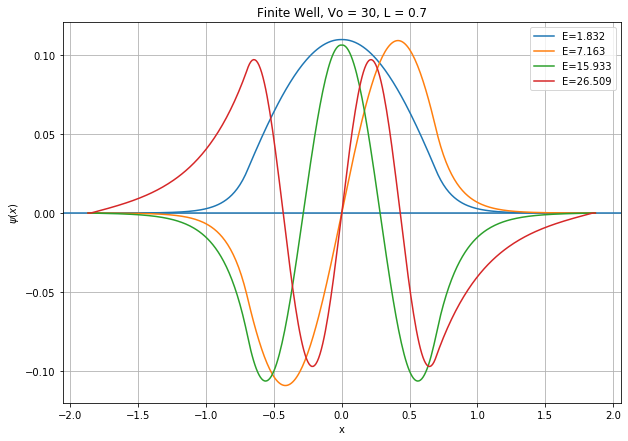

In [30]:
if __name__ == '__main__':
    #test_wavefunction()
    square_well_shooting_app(30,0.7)

In [47]:
x

NameError: name 'x' is not defined

In [ ]:
len(np.concatenate([x,x]))